In [2]:
# Step 1. Import Libraries - Loads required Python packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

In [3]:
# Step 2. Load Dataset - Loads the Breast Cancer dataset.
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Display dataset information
print(df.head())         # Show first few rows
print(df.describe())     # Show statistical summary
print(df.info())         # Show data types and missing values

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [7]:
# Step 3. Split Data - Divides data into 80% training and 20% testing.
X = df.iloc[:, :-1]  # Select all feature columns
y = df.iloc[:, -1]   # Select the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 4. Feature Scaling - Standardizes numeric features for better performance.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Step 5. Train Model - Trains a Random Forest Classifier on the dataset.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Step 6. Make Predictions - Predicts whether a tumor is malignant or benign.
y_pred = model.predict(X_test)

In [11]:
# Step 7. Evaluate Model - Calculates accuracy, precision, recall, and F1-score.
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
 [[40  3]
 [ 1 70]]


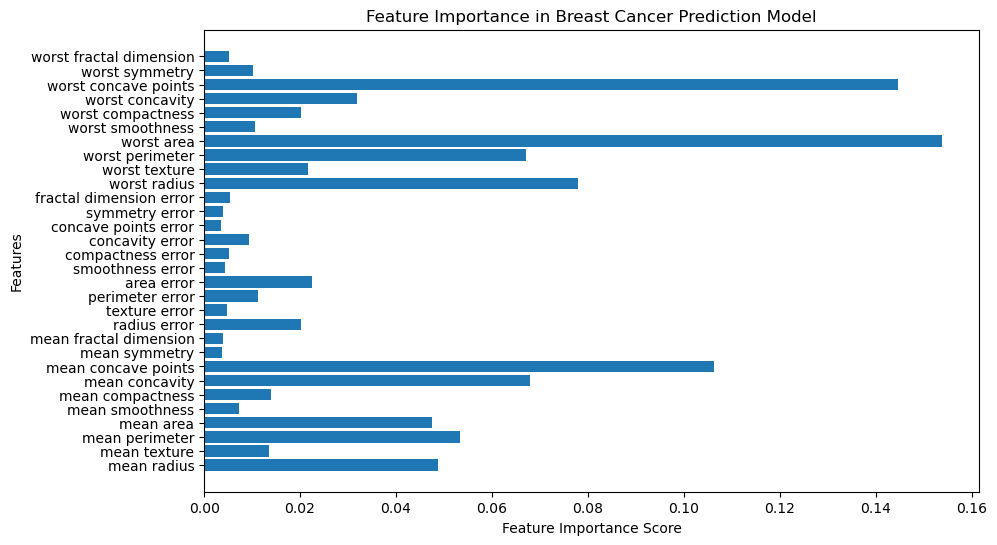

In [12]:
# Step 8. Feature Importance - Shows which features are most useful for diagnosis.
feature_importance = model.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(cancer.feature_names, feature_importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Breast Cancer Prediction Model")
plt.show()